# Importing modules

In [9]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
df.shape

(150, 5)

In [13]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Exploratory Data Analysis

In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
df.apply(lambda x: len(x.unique()))

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

<AxesSubplot:>

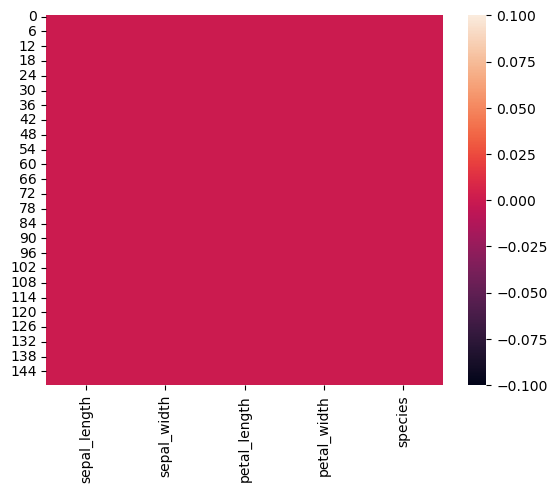

In [17]:
sns.heatmap(df.isnull())

## Heatmap shows no null values present

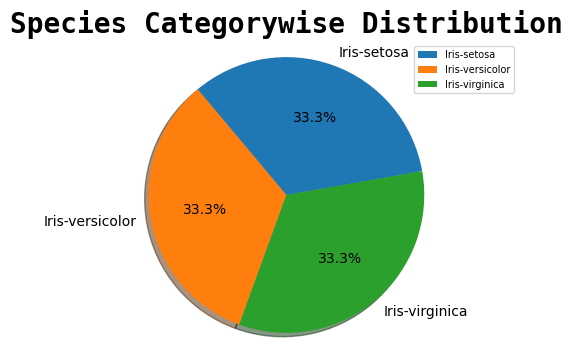

In [18]:
# Pie Chart
ax = df["species"].value_counts()

plt.style.use('default')
plt.figure(figsize=(6,4))
plt.pie(ax.values, labels=ax.index, startangle=10, explode=(None), shadow=True, autopct='%1.1f%%')
plt.title('Species Categorywise Distribution', fontdict={
    'fontname': 'Monospace','fontsize': 20,'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

## The different classes of species are equally distributed and well balanced

# VISUALIZATION

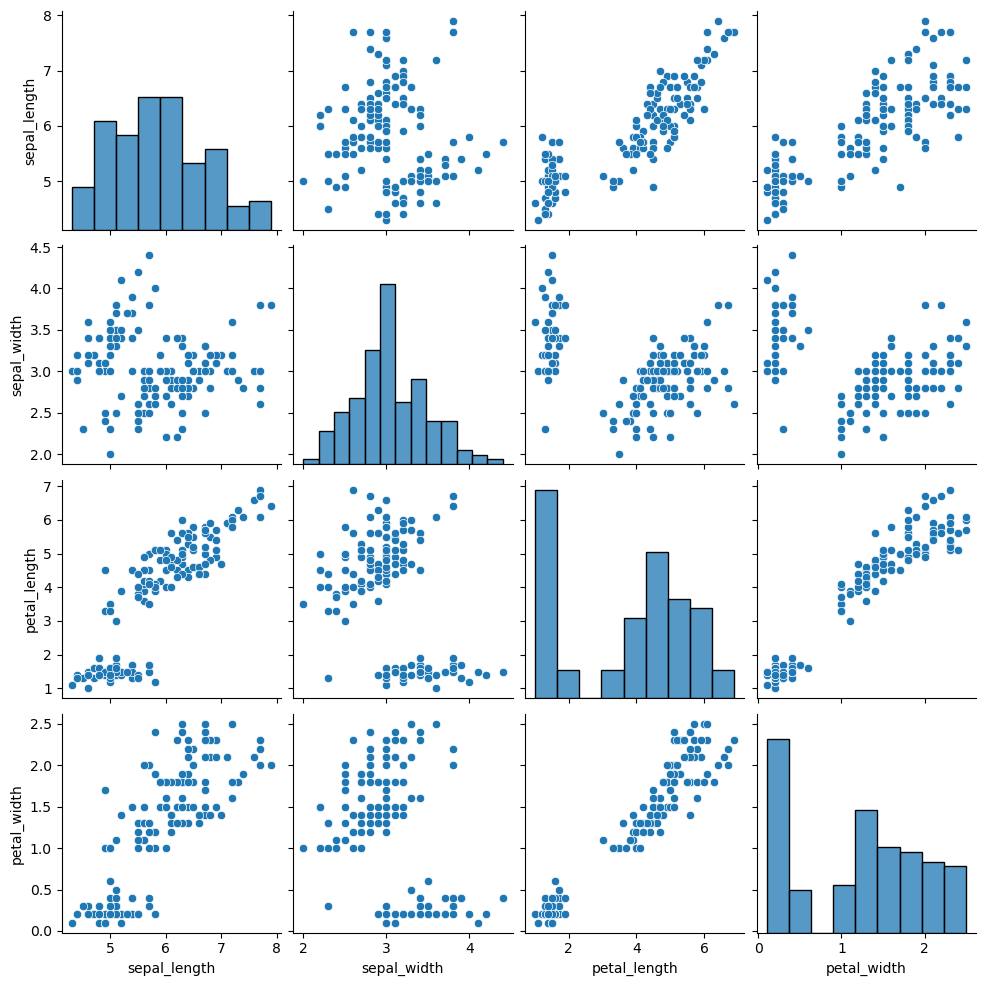

In [19]:
sns.pairplot(df)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

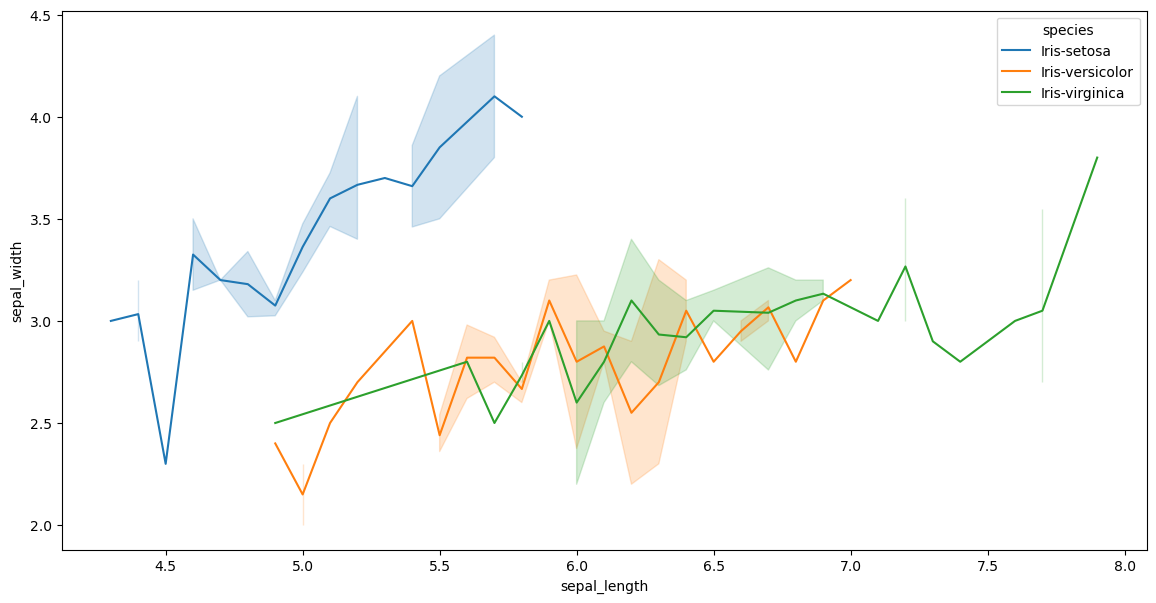

In [20]:
plt.figure(figsize=(14,7))
sns.lineplot(df['sepal_length'],df['sepal_width'],hue=df['species'])

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

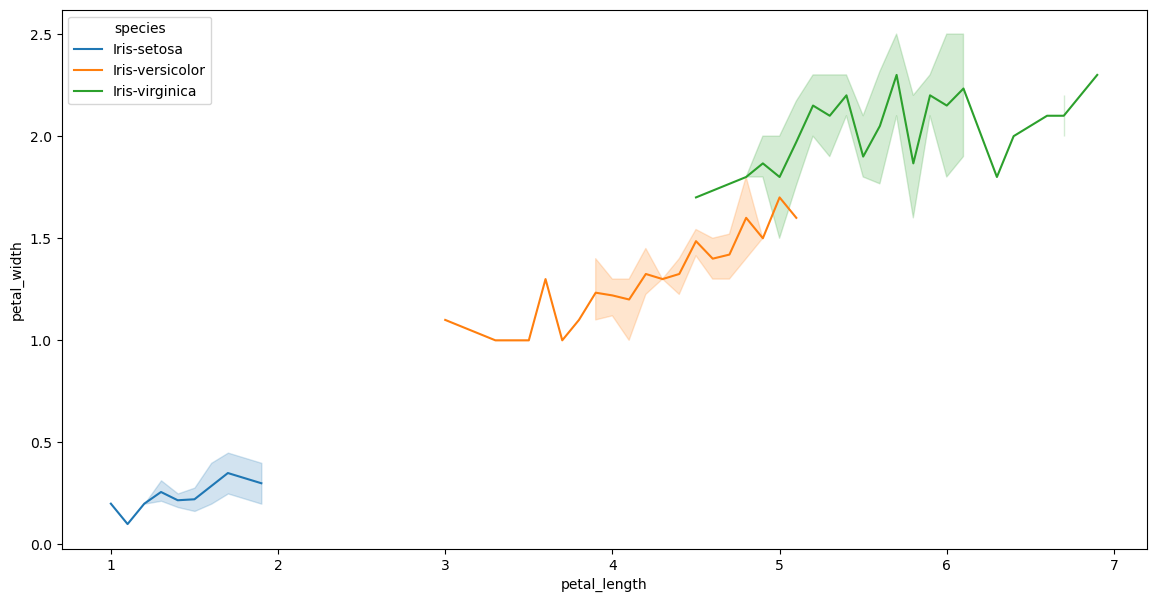

In [21]:
plt.figure(figsize=(14,7))
sns.lineplot(df['petal_length'],df['petal_width'],hue=df['species'])

## sepal length,sepal width,petal length and petal width Iris Virginica flower is higher than other two species

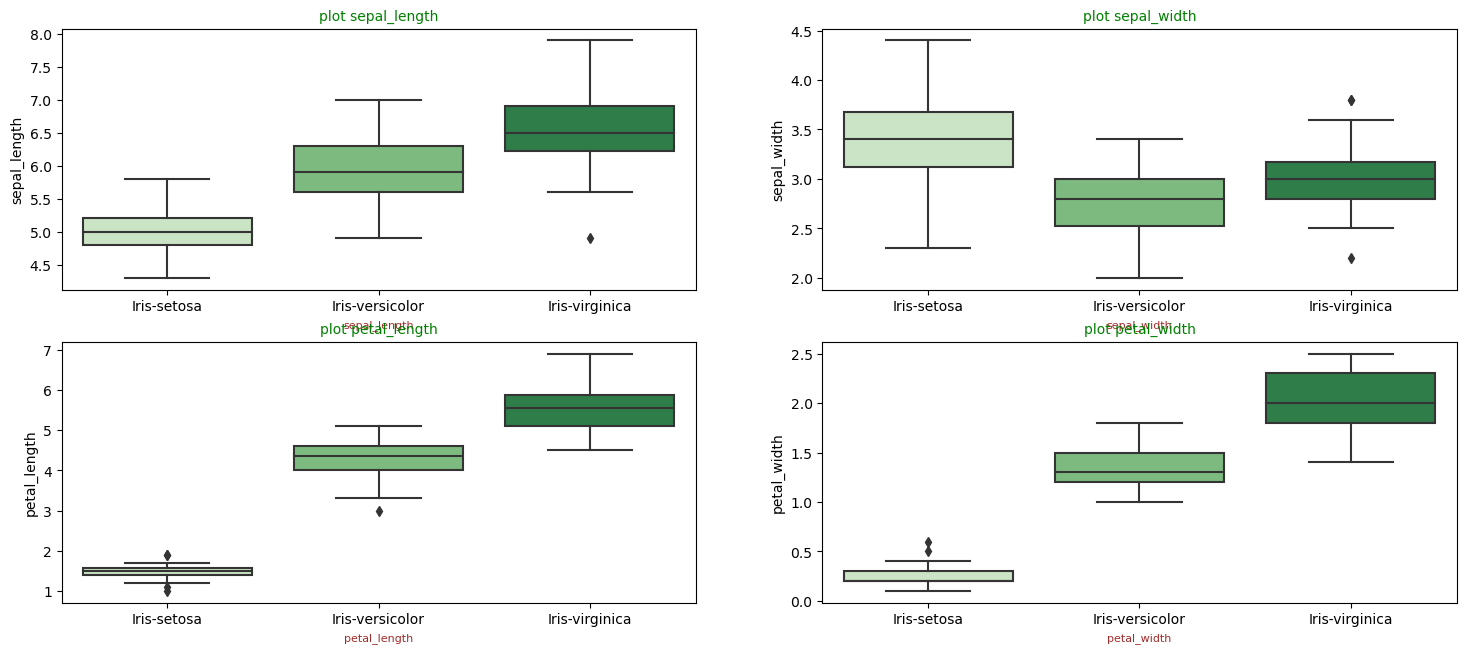

In [22]:
# Box Plot
discrete_cols=['sepal_length','sepal_width','petal_length','petal_width']
plt.figure(figsize=[18,40])

for i, col in enumerate(discrete_cols, 1):
    plt.subplot(10,2,i)
    title_text=f'plot {col}'
    x_label=f'{col}'
    fig= sns.boxplot(data=df, x='species',y=col,palette='Greens')
    fig.set_title(title_text, fontdict={'fontsize':10,'color':'Green'})
    fig.set_xlabel(x_label,fontdict={'fontsize':8,'color':'Brown'})
plt.show()

# DATA PRE-PROCESSING

In [23]:
# converting string data type to int type using LabelEncoding
le=LabelEncoder()
list1=['species']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [24]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [25]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# VISUALIZATION OF CORRELATION

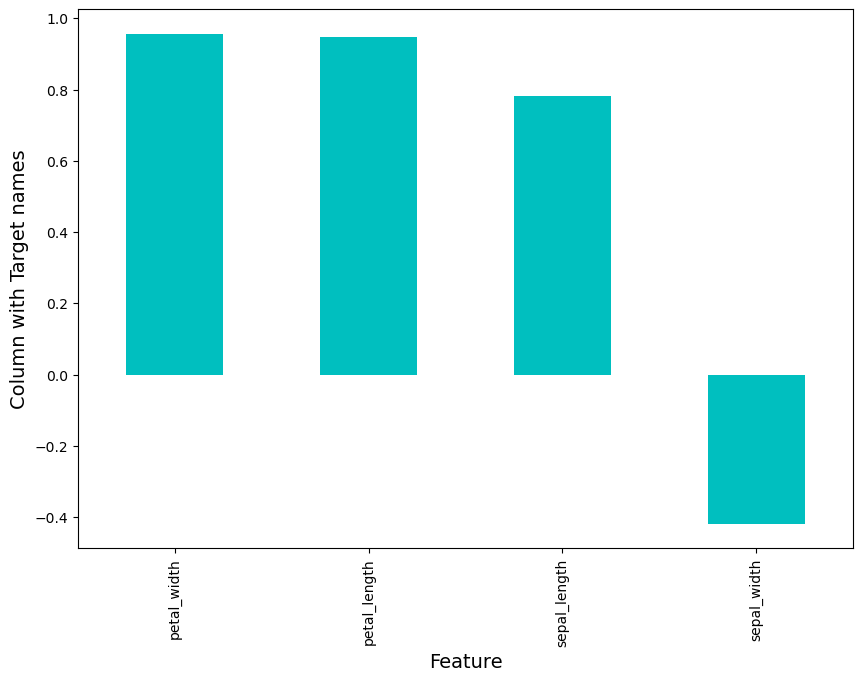

In [26]:
plt.figure(figsize=(10,7))
df.corr()['species'].sort_values(ascending=False).drop(['species']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.show()

In [27]:
df.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
species         0.000000
dtype: float64

## not much skewness present

# Using Quantile Method to Remove Outliers

In [28]:
continous_wise = ['sepal_length','sepal_width','petal_length','petal_width']

Q1 = df[continous_wise].quantile(0.25)
Q3 = df[continous_wise].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[continous_wise] < (Q1 - 1.5 * IQR)) |(df[continous_wise]>(Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(146, 5)

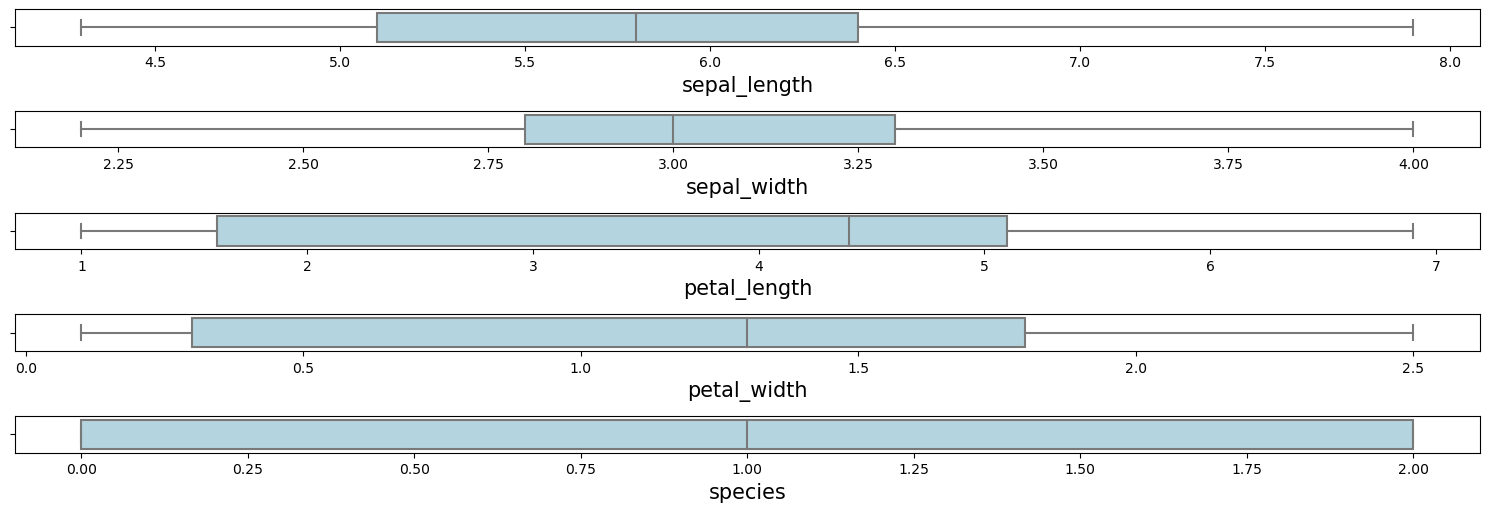

In [29]:
plt.figure(figsize=(15,20))
pltnum=1
for i in df:
    if pltnum<=20:
        plt.subplot(20,1,pltnum)
        sns.boxplot(df[i],color='lightblue')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

## outliers of sepal width column got removed

# Data Seggregation for Model Building

In [30]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# SKEWNESS REMOVAL

In [31]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.90581879,  1.16657324, -1.35780666, -1.35302999],
       [-1.18819651, -0.06620536, -1.35780666, -1.35302999],
       [-1.48212217,  0.43692264, -1.40848935, -1.35302999],
       [-1.63369371,  0.18711245, -1.30671879, -1.35302999],
       [-1.04561684,  1.4035824 , -1.35780666, -1.35302999],
       [-0.50215357,  2.09743058, -1.20337929, -1.08080981],
       [-1.63369371,  0.92653396, -1.35780666, -1.21657685],
       [-1.04561684,  0.92653396, -1.30671879, -1.35302999],
       [-1.94666736, -0.32316963, -1.35780666, -1.35302999],
       [-1.18819651,  0.18711245, -1.30671879, -1.49023044],
       [-0.50215357,  1.63766433, -1.30671879, -1.35302999],
       [-1.33366173,  0.92653396, -1.25523892, -1.35302999],
       [-1.33366173, -0.06620536, -1.35780666, -1.49023044],
       [-2.10833657, -0.06620536, -1.50858127, -1.49023044],
       [ 0.0025686 ,  2.32329432, -1.45875268, -1.35302999],
       [-0.50215357,  2.09743058, -1.40848935, -1.08080981],
       [-0.90581879,  1.

In [32]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x = mmscaler.fit_transform(x)
x

array([[0.28060433, 0.74639756, 0.05864822, 0.04345058],
       [0.21471224, 0.47612008, 0.05864822, 0.04345058],
       [0.14612546, 0.58642713, 0.04379724, 0.04345058],
       [0.11075665, 0.53165811, 0.07361792, 0.04345058],
       [0.24798282, 0.79836004, 0.05864822, 0.04345058],
       [0.37479853, 0.95048107, 0.10389833, 0.12966111],
       [0.11075665, 0.69377074, 0.05864822, 0.08666449],
       [0.24798282, 0.69377074, 0.07361792, 0.04345058],
       [0.03772508, 0.41978259, 0.05864822, 0.04345058],
       [0.21471224, 0.53165811, 0.07361792, 0.        ],
       [0.37479853, 0.84968076, 0.07361792, 0.04345058],
       [0.18076831, 0.69377074, 0.08870249, 0.04345058],
       [0.18076831, 0.47612008, 0.05864822, 0.        ],
       [0.        , 0.47612008, 0.01446844, 0.        ],
       [0.49257411, 1.        , 0.02906915, 0.04345058],
       [0.37479853, 0.95048107, 0.04379724, 0.12966111],
       [0.28060433, 0.74639756, 0.05864822, 0.08666449],
       [0.4639127 , 0.90038103,

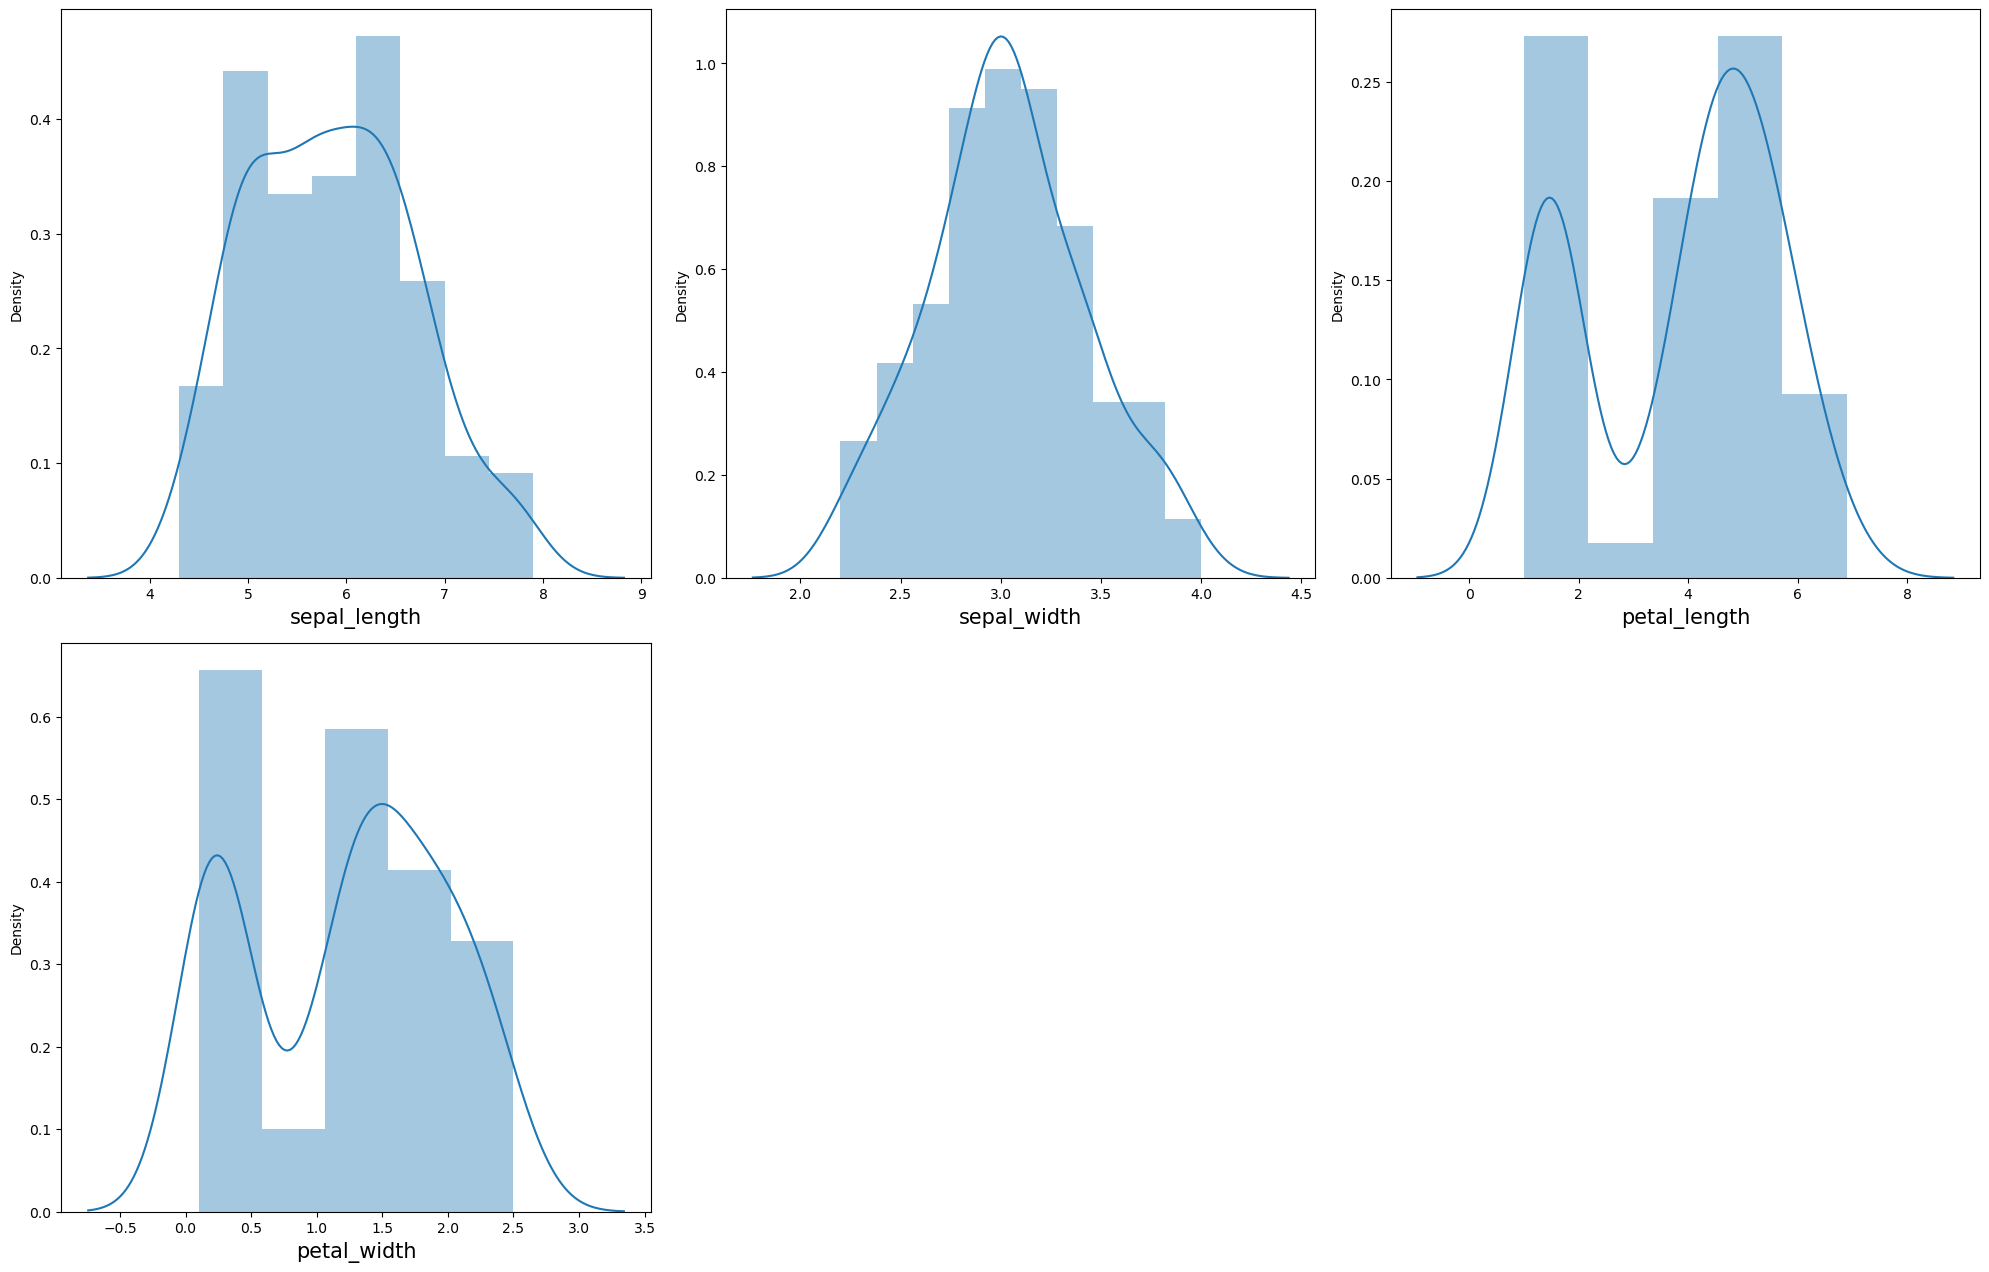

In [33]:
plt.figure(figsize=(20,25))
plotnumber = 1

for col in continous_wise:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

# MODEL PREDICTION

In [34]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

# DECISION TREE CLASSIFIER

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1)
dtc.fit(x_train,y_train)
pred_test_dtc = dtc.predict(x_test)
pred_train_dtc = dtc.predict(x_train)
dtc_score = dtc.score(x_test,y_test)
print('score of model is:',dtc_score*100)

score of model is: 90.9090909090909


In [37]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_dtc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_dtc)*100)

Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 90.9090909090909


# CROSS VALIDATION

In [39]:
cv_score_dtc=cross_val_score(dtc,x,y,cv=5)
cv_mean_dtc=cv_score_dtc.mean()
print("cv_mean is:",cv_mean_dtc*100)

cv_mean is: 95.19540229885057


# Confusion  Matrix

In [40]:
print(confusion_matrix(y_test,pred_test_dtc))

[[11  0  0]
 [ 0 12  1]
 [ 0  3 17]]


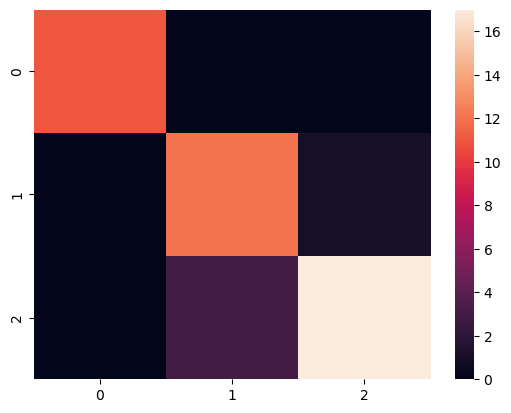

In [41]:
sns.heatmap(confusion_matrix(y_test,pred_test_dtc))
plt.show()

# Classification Report

In [42]:
print(classification_report(y_test,pred_test_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.80      0.92      0.86        13
           2       0.94      0.85      0.89        20

    accuracy                           0.91        44
   macro avg       0.91      0.92      0.92        44
weighted avg       0.92      0.91      0.91        44



# AUC-ROC CURVE:

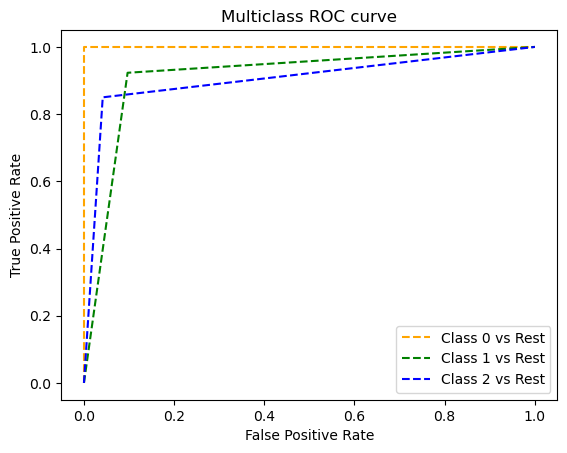

In [43]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
clf = OneVsRestClassifier(DecisionTreeClassifier())
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)
fpr ={}
tpr ={}
thresh ={}
n_class=3
for i in range(n_class):
    fpr[i],tpr[i],thresh[i] = roc_curve(y_test,pred_prob[:,i],pos_label=i)
    
plt.plot(fpr[0],tpr[0],linestyle='--',color='orange',label='Class 0 vs Rest')
plt.plot(fpr[1],tpr[1],linestyle='--',color='green',label='Class 1 vs Rest')
plt.plot(fpr[2],tpr[2],linestyle='--',color='blue',label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

# OUTPUT

In [44]:
import numpy as np
a=np.array(y_test)
predicted=np.array(dtc.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con

,Original,Predicted
0,2,2
1,1,1
2,2,2
3,1,1
4,2,2
5,2,2
6,0,0
7,2,2
8,2,2
9,0,0


# Make new test data ready

In [45]:
import sklearn.datasets as datasets
import pandas as pd

In [46]:
iris=datasets.load_iris()

In [47]:
test_input=pd.DataFrame(iris.data,columns=iris.feature_names)
print(test_input.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [48]:
test_input.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [49]:
test_target=iris.target
print(test_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Visualize Decision Tree

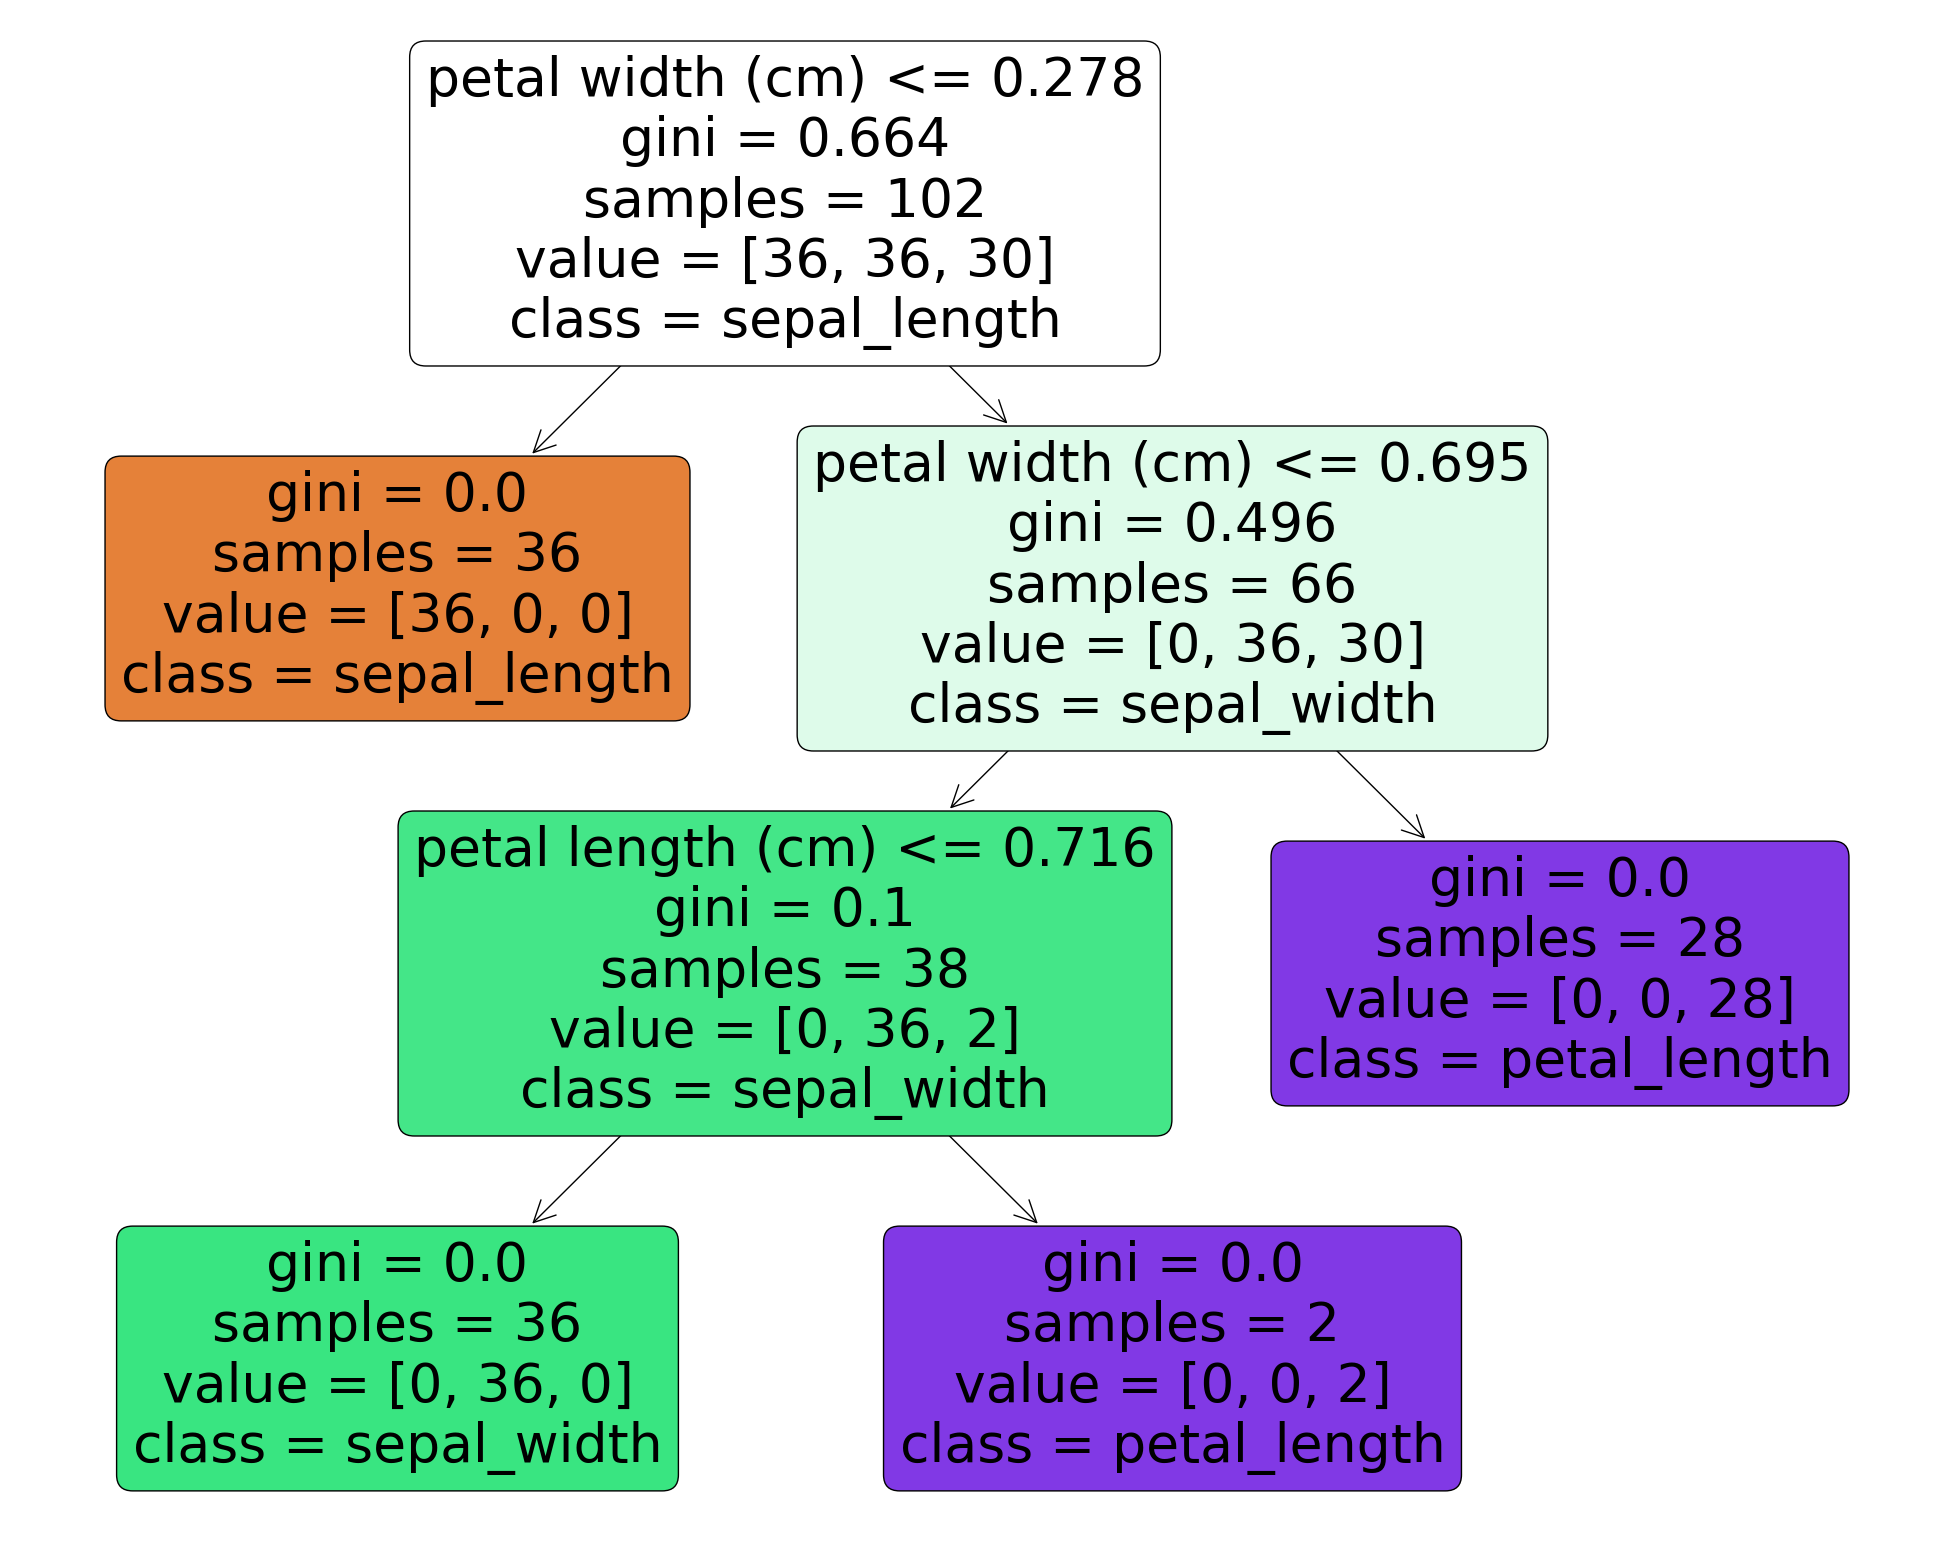

In [50]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(dtc,feature_names=iris.feature_names,
              class_names=['sepal_length','sepal_width','petal_length','petal_width'],
              rounded=True,filled=True);

# PREDICTION

In [51]:
Encoded_class=pd.DataFrame({'species':["Iris-setosa","Iris-versicolor","Iris-virginica"],
                           'Encoded':[0,1,2]})
Encoded_class

,species,Encoded
0,Iris-setosa,0
1,Iris-versicolor,1
2,Iris-virginica,2


In [52]:
Encoded_class.set_index("species")

,Encoded
species,
Iris-setosa,0
Iris-versicolor,1
Iris-virginica,2


In [53]:
preds_data1=df.iloc[32]
preds_data1

sepal_length    5.0
sepal_width     3.2
petal_length    1.2
petal_width     0.2
species         0.0
Name: 35, dtype: float64

In [54]:
preds_data2=df.iloc[76]
preds_data2

sepal_length    5.5
sepal_width     2.4
petal_length    3.8
petal_width     1.1
species         1.0
Name: 80, dtype: float64

In [55]:
preds_data3=df.iloc[132]
preds_data3

sepal_length    6.3
sepal_width     3.4
petal_length    5.6
petal_width     2.4
species         2.0
Name: 136, dtype: float64

In [56]:
pred_x1=pd.DataFrame(np.array([5.5,2.4,3.8,1.1]).reshape(1,-1),
                    columns=['sepal_length','sepal_width','petal_length','petal_width'])
pred_y1=clf.predict(pred_x1)
pred_class2=Encoded_class[Encoded_class["Encoded"]==pred_y1[0]]["species"].item()
print(f"Predicted class by model on preds_data2 :{pred_class2}")

Predicted class by model on preds_data2 :Iris-virginica


In [57]:
pred_x2=pd.DataFrame(np.array([6.3,3.4,5.6,2.4]).reshape(1,-1),
                    columns=['sepal_length','sepal_width','petal_length','petal_width'])
pred_y2=clf.predict(pred_x2)
pred_class3=Encoded_class[Encoded_class["Encoded"]==pred_y2[0]]["species"].item()
print(f"Predicted class by model on preds_data3 :{pred_class3}")

Predicted class by model on preds_data3 :Iris-virginica
